In [14]:
# Importing libraries
import pandas as pd
import re

# Download file
file_path = 'high-school-directory.csv'

# Read CSV
df = pd.read_csv(file_path)

# View first lines
df.head()

,dbn,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,Council District,Census Tract,BIN,BBL,NTA,Zip Codes,Community Districts,Borough Boundaries,City Council Districts,Police Precincts
0,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,20529.0,51,3,47,59
1,21K559,Life Academy High School for Film and Music,Brooklyn,K400,718-333-7750,718-333-7775,9.0,12,NaN,NaN,...,47.0,306.0,3186454.0,3.068830e+09,Gravesend ...,17616.0,21,2,45,35
2,16K393,Frederick Douglass Academy IV Secondary School,Brooklyn,K026,718-574-2820,718-574-2821,9.0,12,NaN,NaN,...,36.0,291.0,3393805.0,3.016160e+09,Stuyvesant Heights ...,18181.0,69,2,49,52
3,08X305,Pablo Neruda Academy,Bronx,X450,718-824-1682,718-824-1663,9.0,12,NaN,NaN,...,18.0,16.0,2022205.0,2.036040e+09,Soundview-Castle Hill-Clason Point-Harding Par...,11611.0,58,5,31,26
4,03M485,Fiorello H. LaGuardia High School of Music & A...,Manhattan,M485,212-496-0700,212-724-5748,9.0,12,NaN,NaN,...,6.0,151.0,1030341.0,1.011560e+09,Lincoln Square ...,12420.0,20,4,19,12


In [15]:
# Cleaning column names:
# - lower case
# - spaces -> _
# - removal of special characters
df.columns = [
    re.sub(r'[^a-z0-9_]', '', col.lower().replace(' ', '_'))
    for col in df.columns
]

# Checking the result
df.columns[:10]

Index(['dbn', 'school_name', 'borough', 'building_code', 'phone_number',
       'fax_number', 'grade_span_min', 'grade_span_max', 'expgrade_span_min',
       'expgrade_span_max'],
      dtype='object')

In [16]:
# Number of rows and columns
df.shape

(435, 69)

In [17]:
# Unique boroughs
df['borough'].unique()

array(['Queens', 'Brooklyn', 'Bronx', 'Manhattan', 'Staten Island'],
      dtype=object)

In [18]:
# Number of schools in each district
df['borough'].value_counts()

,count
borough,
Brooklyn,121
Bronx,118
Manhattan,106
Queens,80
Staten Island,10


In [19]:
# Unique class combinations
df[['grade_span_min', 'grade_span_max']].drop_duplicates().sort_values(by='grade_span_min')

,grade_span_min,grade_span_max
10,6.0,12
47,6.0,11
175,6.0,9
358,7.0,12
34,9.0,10
8,9.0,11
0,9.0,12
130,NaN,11
203,NaN,12


In [20]:
# Schools without first grade classes
df[df['grade_span_min'].isna()][['school_name', 'grade_span_max']]

,school_name,grade_span_max
130,Special Music School,11
203,The Michael J. Petrides School,12
355,"New Explorations into Science, Technology and ...",12


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuring graph display
%matplotlib inline

# Graph style
sns.set(style="whitegrid")

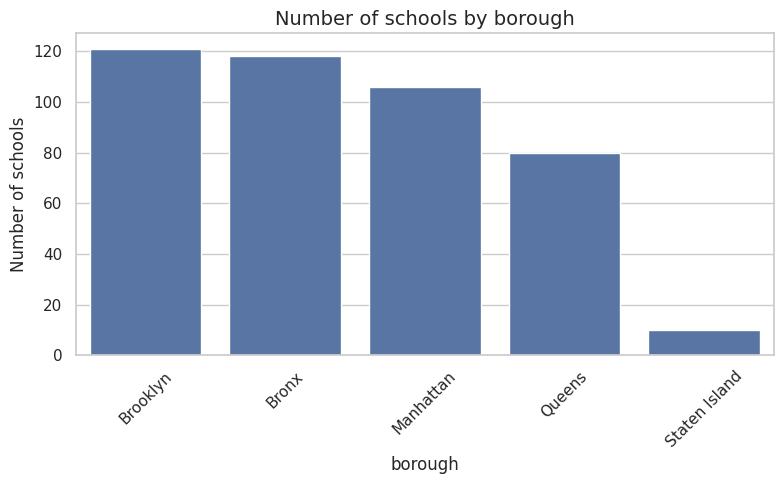

In [22]:
# Graph: Number of schools by district
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='borough', order=df['borough'].value_counts().index)

plt.title('Number of schools by borough', fontsize=14)
plt.xlabel('borough')
plt.ylabel('Number of schools')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

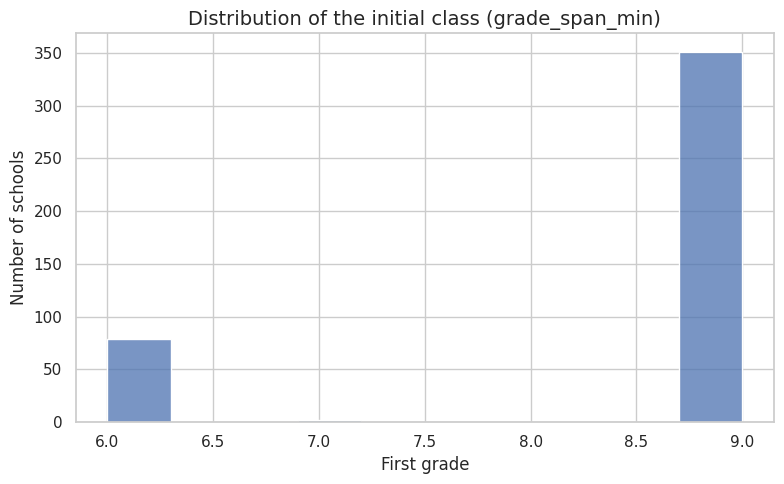

In [23]:
# Schedule: starting grade (grade_span_min)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='grade_span_min', bins=10, kde=False)

plt.title('Distribution of the initial class (grade_span_min)', fontsize=14)
plt.xlabel('First grade')
plt.ylabel('Number of schools')
plt.tight_layout()
plt.show()

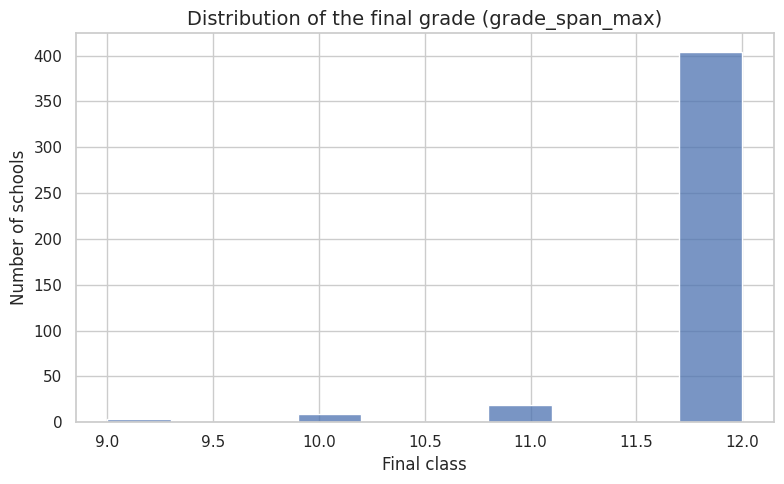

In [24]:
# Schedule: final grade (grade_span_max)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='grade_span_max', bins=10, kde=False)

plt.title('Distribution of the final grade (grade_span_max)', fontsize=14)
plt.xlabel('Final class')
plt.ylabel('Number of schools')
plt.tight_layout()
plt.show()

## Final conclusions on the NYC High School Directory

### 1. Distribution of schools by borough:
- **Brooklyn** — 121 schools
- **Bronx** — 118 schools
- **Manhattan** — 106 schools
- **Queens** — 80 schools
- **Staten Island** — 10 schools

The largest number of schools are in Brooklyn and the Bronx.

---

### 2. Grade Span:
- The most common range is **grades 9 through 12**, which corresponds to the high school structure.
- There are also non-standard schools:
  - grades 6 through 9 / 11 / 12
  - grades 7 through 12

---
